In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
plt.rcParams['animation.embed_limit'] = 2**128
rc('animation', html='jshtml')

In [3]:
import Evolve
import Torus, Ring
import utilities
from metric import *

In [4]:
k=6
primes=utilities.primes_up_to(k)
n= primes.sum()+3*len(primes)
pi= [i for i in range(n)]
states= [0 for i in range(n)]
j=2
for p in primes:
    for t in range(p+1):
        states[j+t] = State.OFF
    states[(j+p+1)%n] = State.ON
    states[(j+p+2)%n] = State.ON
    j= j+p+3
    
j=2
rules= [0 for i in range(n)]
for p in primes:
    for t in range(p-1):
        rules[j+t] = Rule.UNSTABLE
    for i in range(4):
        rules[(j+p-1+i)%n]=Rule.STABLE
    j= j+p+3

In [5]:
ring= Ring.createRing(n, 0.5, 0.5)
ring.setStates(states)
ring.setRules(rules)


### Métricas

Density: Proporcion de 1's en una configuración.

SpinGlass: Energía de una configuración dada por $E(x)= -\frac12 \langle x, Ax \rangle + bx$

Hamming: Distancia de Hamming entre una configuración y la anterior

(requiere llamarlas desde el archivo Metric, ej: Metric.Density)


In [6]:
evol, metrics = Evolve.evolve(ring, pi, 90, metricList=[Metric.Density, Metric.SpinGlass], sequential=False)
title = str(n) + ' Ring, experiment'

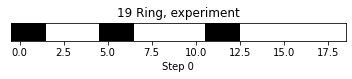

In [7]:
anim = Evolve.animate(evol, title=title, shape=(1, n), save=False, interval=100)

In [8]:
anim

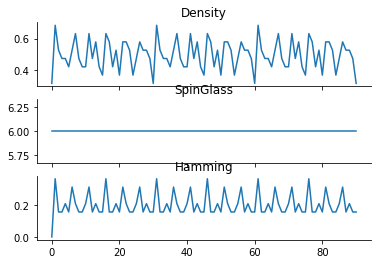

In [18]:
Evolve.plot_metrics(metrics)